In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# convert display of scientific compute to float
pd.options.display.float_format = '{:.2f}'.format

# Read in the data
data = pd.read_csv('../notebooks/data/merged_inputed_data.csv')

In [2]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

X, y = data.drop('CNT', axis=1), data['CNT']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_withconstant = sm.add_constant(X_train)

# instantiate model
model = sm.OLS(y_train, X_withconstant)

# fit model
results = model.fit()

# predictions
y_preds = results.predict(X_withconstant)

# r2 score
print(f'R-2 Score: {results.rsquared}')


R-2 Score: 0.9230597780719163


In [3]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    CNT   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     20.93
Date:                Wed, 21 Feb 2024   Prob (F-statistic):          2.01e-215
Time:                        18:18:23   Log-Likelihood:                -2069.5
No. Observations:                 978   AIC:                             4853.
Df Residuals:                     621   BIC:                             6597.
Df Model:                         356                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [4]:
results_summary = results.summary()
results_as_html = results_summary.tables[1].as_html()
results = pd.read_html(results_as_html, header=0, index_col=0)[0]

In [5]:
# sort results where p<|t| is between 0.05 and 0.1
results[results['P>|t|'].between(0.0, 0.05)].sort_values(by='coef', ascending=False)


,coef,std err,t,P>|t|,[0.025,0.975]
test_Propoxyphene_19,4.55,1.67,2.72,0.01,1.27,7.83
test_Amphetamines_20,4.13,1.42,2.91,0.00,1.34,6.91
test_Amphetamines_9,3.32,1.35,2.46,0.01,0.67,5.97
test_Amphetamines_12,3.06,1.31,2.33,0.02,0.48,5.63
responder,2.85,0.47,6.12,0.00,1.93,3.76
test_Propoxyphene_0,2.82,0.93,3.05,0.00,1.01,4.64
test_Oxycodone_17,2.46,1.01,2.44,0.01,0.48,4.44
test_Oxycodone_12,2.42,1.11,2.18,0.03,0.24,4.60
test_Cannabinoids_22,2.16,0.69,3.12,0.00,0.80,3.52
test_Oxycodone_24,1.99,0.82,2.42,0.02,0.38,3.60


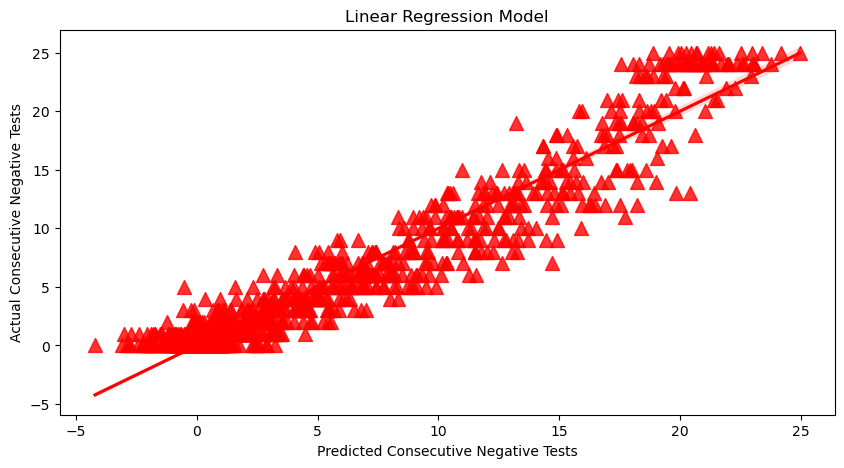

In [6]:
# plot predictions vs actual
fig = sns.regplot(x=y_preds, y=y_train, color='red', marker="^", scatter_kws={"s": 100})
fig.set(title="Linear Regression Model", xlabel="Predicted Consecutive Negative Tests", ylabel="Actual Consecutive Negative Tests")
fig.figure.set_size_inches(10, 5)
plt.show(fig)

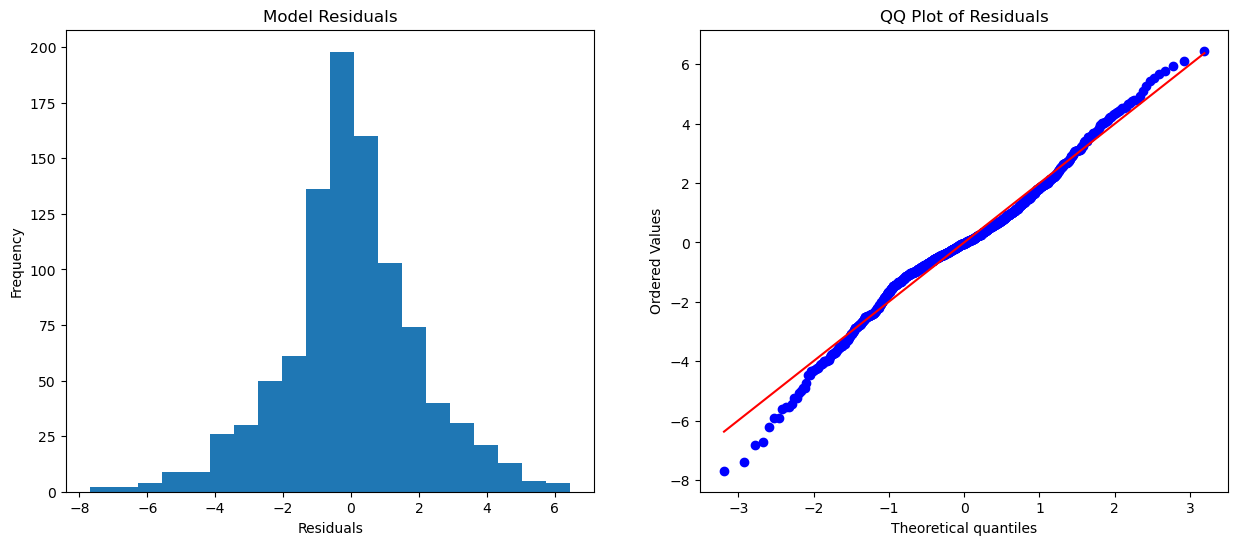

In [7]:
from scipy import stats

# plot residuals to check model assumptions

# Calculate residuals
model_resids = y_train - y_preds

# Calculate residuals
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot histogram of residuals
ax1.hist(model_resids, bins=20)
ax1.set_title('Model Residuals')
ax1.set_xlabel('Residuals')
ax1.set_ylabel('Frequency')

# Plot QQ plot of residuals
stats.probplot(model_resids, dist="norm", plot=ax2)
ax2.set_title('QQ Plot of Residuals')

plt.show()
